<b>Задание</b>
1. Восстановите пропуски в столбце kitchen_area. 
2. Добавьте информацию из датасета region.csv.
3. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.
4. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.
5. Когда выгодно покупать/продавать объект недвижимости?
6. Создайте модель прогноза цены объекта недвижимости.


In [1]:
# импортируем библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LassoCV, RidgeCV
import warnings

In [2]:
import pandas as pd
df = pd.read_csv('realty_18_21.csv') #импортируем данные

In [3]:
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,11


In [4]:
df.info() #выводим информацию по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   region         int64  
 3   building_type  int64  
 4   level          int64  
 5   levels         int64  
 6   rooms          int64  
 7   area           float64
 8   kitchen_area   float64
 9   object_type    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 417.9+ MB


In [5]:
print(df.shape)

(5477006, 10)


1. Датасет содержит 5477006 строк и 10 стобцов

2. 2 стобца (с общей площадью и площадью кухни) имеет тип данных float (вещественные числа), 1 стобец (дата) тип данных object и 7 стобцов тип данных int. Столбец с датами имеют типа данных object, это надо исправить

In [6]:
#поменяем формат с датой
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%dT%H:%M:%S') #изменим тип данных для  столбца, применим нужный формат

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 10 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   region         int64         
 3   building_type  int64         
 4   level          int64         
 5   levels         int64         
 6   rooms          int64         
 7   area           float64       
 8   kitchen_area   float64       
 9   object_type    int64         
dtypes: datetime64[ns](1), float64(2), int64(7)
memory usage: 417.9 MB


Начнём проверять по столбцам

##### 1. object_type

In [8]:
# выводим уникальные значения
df['object_type'].unique()

array([ 1, 11], dtype=int64)

Итак, что мы выяснили, object_type содержит некоторое число 11, что вообще не входит в наше допустимые данные. Заменим их на 2 - новостройки.

In [9]:
#заменяем
df['object_type'] = df['object_type'].replace(11, 2)
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,2
5477002,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,2
5477003,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,2


In [10]:
#проверим на дубликаты
df.loc[df.duplicated(keep=False)]

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
402,1300000,2018-09-08,9654,1,5,10,1,41.36,10.88,2
403,1750000,2018-09-08,9654,1,9,10,1,58.03,17.00,1
420,1050000,2018-09-08,9654,1,3,10,1,33.58,5.00,1
421,1700000,2018-09-08,9654,1,1,10,1,58.03,17.00,1
433,940240,2018-09-08,9654,1,4,10,1,33.58,5.00,2
...,...,...,...,...,...,...,...,...,...,...
5475660,5000000,2021-05-01,3991,1,7,9,3,65.00,8.60,1
5475971,3900000,2021-05-01,2604,3,4,10,2,48.00,9.00,1
5476318,5280000,2021-05-01,2661,2,14,18,1,44.00,10.00,1
5476380,6400000,2021-05-01,3991,3,6,9,2,87.00,19.50,1


In [11]:
#удаляем
df = df.drop_duplicates().reset_index(drop=True)
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5241346,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,2
5241347,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,2
5241348,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5241349,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,2


##### 2. price

In [12]:
df['price'].describe()

count    5.241351e+06
mean     4.505812e+06
std      2.023238e+07
min     -2.144967e+09
25%      2.000000e+06
50%      3.050000e+06
75%      4.940000e+06
max      2.147484e+09
Name: price, dtype: float64

Видим, что цена имеет отрицательное минимальное значение, чего не может быть.

In [13]:
df.query('price <= 0')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
43244,-1633967296,2018-09-14,5520,1,13,22,1,38.92,NaN,2
43245,-1633967296,2018-09-14,5520,1,14,22,1,38.92,17.26,2
171456,0,2018-10-01,6817,3,5,10,3,104.00,15.00,1
190680,-429242296,2018-10-04,9654,2,5,25,2,57.27,9.31,2
198061,-1744967296,2018-10-06,9654,3,4,5,2,45.00,6.00,1
...,...,...,...,...,...,...,...,...,...,...
5147253,-2041757296,2021-04-23,2604,3,2,4,1,41.08,9.31,2
5147655,-1794967296,2021-04-23,81,1,4,5,2,56.00,9.00,1
5163220,-1494967296,2021-04-26,2843,3,3,3,1,45.00,17.00,2
5184182,-2094967296,2021-04-27,3991,3,14,19,1,30.00,8.00,1


In [14]:
# удаляем эти строи с отрицательной ценой
df = df.query('price > 0').reset_index(drop=True)

Что же насчёт выбросов?

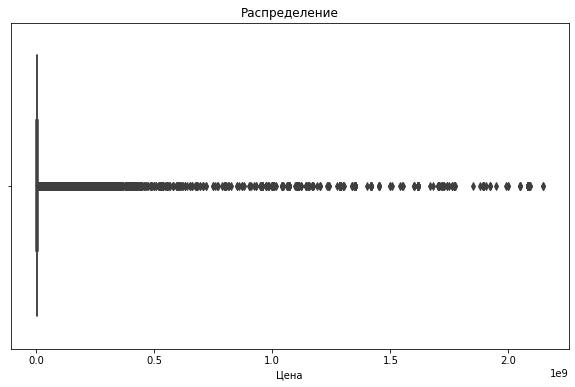

In [16]:
plt.figure(figsize = (10, 6))
# строим boxplot:
sns.boxplot(data=df, x='price')
plt.title('Распределение')
plt.xlabel('Цена')
plt.show()

Видим длинные тянущиеся выбросы, это необходимо исправить

In [19]:
# вычисляем межквартильный размах:
iqr = 1.5 * (np.percentile(df['price'], 75) - np.percentile(df['price'], 25))
# вычисляем значения усов:
left = np.percentile(df['price'], 25) - iqr 
right = np.percentile(df['price'], 75) + iqr
new = df.query('@left <= price <= @right')['price'].count()
# вычисляем долю от общего объема:
fraction = 1 - new / df.shape[0]
# вычисляем результаты:
print(f'Усы: {left, right}')
print(f'Объем данных без выбросов: {new}')
print(f'Доля выбросов: {fraction:.2%}')

Усы: (-2410000.0, 9350000.0)
Объем данных без выбросов: 4835848
Доля выбросов: 7.73%


Все выбросы мы удалить не  можем, необходимо лишь уменьшить до какого-то числа

In [20]:
# вычисляем значения усов:
left = np.percentile(df['price'], 0.01)
right = np.percentile(df['price'], 99.95)
# создаем срез данных, удовлетворяющих условию и считаем его объем:
new = df.query('@left <= price <= @right')['price'].count()
# вычисляем долю от общего объема:
fraction = 1 - new / df.shape[0]
# вычисляем результаты:
print(f'Усы: {left, right}')
print(f'Объем данных без выбросов: {new}')
print(f'Доля выбросов: {fraction:.2%}')

Усы: (1350.0, 132500000.0)
Объем данных без выбросов: 5237875
Доля выбросов: 0.06%


In [21]:
df = df.query('@left <= price <= @right').reset_index(drop=True)
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5237870,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,2
5237871,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,2
5237872,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5237873,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,2


##### 3. region

In [22]:
# выводим уникальные значения
df['region'].unique()

array([ 2661,    81,  2871,  2843,     3,  3106,  2922,  2900,  2722,
        6171,  3230,  4417,  5282,  5368,  3446,  5520,  6817,  9579,
        2604,  1010,  9648,  7793, 13919,  2860,  3019,  4982,  5241,
        3870,  3991,  2359,  9654,  2072,  8090,  4007, 11171, 10160,
        7873,  2594,  8509, 11416, 11991,  2880,  5178, 13913,  6309,
        5952,  6543,  2328,  5993,  2484, 13098,  4240,  5789,  1901,
       14880, 10201,  1491,  2885,  5794,  2528,  4374,  4695,  5143,
        6937,  2806, 14368,  5736,  7121,  4086,   821, 10582,  7896,
        8640,  5703,  8894,  4249,  3153,  4189,  2814,  7929, 16705,
          69,  4963, 61888], dtype=int64)

##### 4. building_type

In [23]:
# выводим уникальные значения
df['building_type'].unique()

array([1, 3, 4, 2, 5, 0], dtype=int64)

Нет проблем

##### 5. level

In [24]:
# выводим уникальные значения
df['level'].unique()

array([ 8,  5, 12, 13,  4,  1,  2,  9, 10, 25,  7,  6, 16, 17, 14, 11,  3,
       18, 15, 23, 21, 20, 22, 19, 28, 24, 26, 32, 30, 27, 31, 29, 34, 33,
       35, 37, 36, 39, 38], dtype=int64)

Нет проблем

##### 6. levels

In [25]:
# выводим уникальные значения
df['levels'].unique()

array([10, 24,  9, 16, 14,  5, 25, 15, 17,  8,  2,  3, 18,  4, 22, 12, 20,
        7, 19,  6, 23, 27,  1, 21, 11, 28, 13, 36, 26, 33, 34, 30, 29, 35,
       32, 31, 37, 38, 39], dtype=int64)

Нет проблем

##### 7. rooms

In [26]:
# выводим уникальные значения
df['rooms'].unique()

array([ 3,  2,  1,  4, -1,  5,  7,  6,  8,  9, -2, 10], dtype=int64)

Здесь есть предложение удалить квартиры с -2 комнатами, чтобы они не путали наши данные

In [28]:
df = df.query('rooms != -2').reset_index(drop=True)
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5237550,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,2
5237551,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,2
5237552,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5237553,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,2


##### 8. area

In [29]:
# выводим основные числовые характеристики:
df['area'].describe()

count    5.237555e+06
mean     5.386837e+01
std      3.316165e+01
min      7.000000e-02
25%      3.800000e+01
50%      4.802000e+01
75%      6.313000e+01
max      7.856000e+03
Name: area, dtype: float64

Посмотрим на выбросы

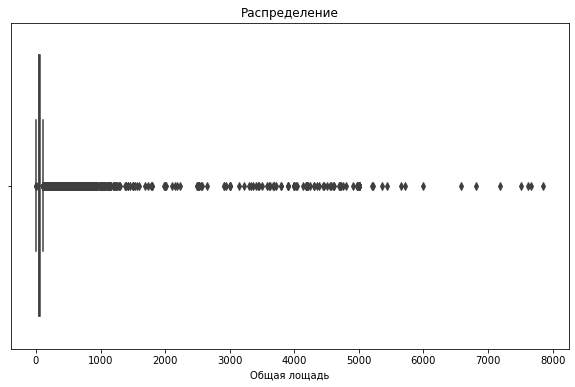

In [31]:
plt.figure(figsize = (10, 6))
# строим boxplot:
sns.boxplot(data=df, x='area')
plt.title('Распределение')
plt.xlabel('Общая лощадь')
plt.show()

Присутствует длинная цепь выбросов

In [33]:
# вычисляем межквартильный размах:
iqr = 1.5 * (np.percentile(df['area'], 75) - np.percentile(df['area'], 25))
# вычисляем значения усов:
left = np.percentile(df['area'], 25) - iqr 
right = np.percentile(df['area'], 75) + iqr 
# создаем срез данных, удовлетворяющих условию и считаем его объем:
new = df.query('@left <= area <= @right')['area'].count()
# вычисляем долю от общего объема:
fraction = 1 - new / df.shape[0]
# вычисляем результаты:
print(f'Усы: {left, right}')
print(f'Объем данных без выбросов: {new}')
print(f'Доля выбросов: {fraction:.2%}')

Усы: (0.3049999999999926, 100.82500000000002)
Объем данных без выбросов: 5050364
Доля выбросов: 3.57%


In [34]:
# вычисляем значения усов:
left = np.percentile(df['area'], 0.01)
right = np.percentile(df['area'], 99.95)
# создаем срез данных, удовлетворяющих условию и считаем его объем:
new = df.query('@left <= area <= @right')['area'].count()
# вычисляем долю от общего объема:
fraction = 1 - new / df.shape[0]
# вычисляем результаты:
print(f'Усы: {left, right}')
print(f'Объем данных без выбросов: {new}')
print(f'Доля выбросов: {fraction:.2%}')

Усы: (3.07, 352.0)
Объем данных без выбросов: 5234418
Доля выбросов: 0.06%


Стоит также проверить, а хорошо ли у нас соотносится площадь кухни с общей площадью, нет ли там проблем.

In [35]:
df.query('area < kitchen_area')

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
501,4599000,2018-09-08,9654,3,6,10,2,5.60,7.70,1
668,1350000,2018-09-08,9654,1,5,10,1,13.78,48.02,2
4441,1570000,2018-09-08,1010,3,4,5,1,32.00,65.00,1
5650,1740900,2018-09-09,9654,1,4,10,2,58.03,78.00,2
5940,1350000,2018-09-09,9654,1,5,10,1,13.78,48.02,2
...,...,...,...,...,...,...,...,...,...,...
4862587,37884000,2021-03-01,2871,2,3,6,3,172.00,340.00,2
4922806,950000,2021-03-16,3991,3,1,3,1,15.00,23.00,1
4982976,2300000,2021-03-26,3991,3,1,5,1,31.00,60.00,1
5216502,2750000,2021-04-30,9648,4,3,3,2,45.00,45.60,1


Что же мы видим?  Целых 2992 строки содежат неверные значения, где площадь кухни больше больше общей площади. Такое не может быть, значит, избавимся от этого.

In [38]:
df = df.query('not (area < kitchen_area)').reset_index(drop=True)

In [39]:
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...
5234699,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,2
5234700,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,2
5234701,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1
5234702,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,2


### 1. Восстановите пропуски в столбце kitchen_area.

In [40]:
df.isna() #выводим данные о пропущенных значениях

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5234699,False,False,False,False,False,False,False,False,False,False
5234700,False,False,False,False,False,False,False,False,False,False
5234701,False,False,False,False,False,False,False,False,False,False
5234702,False,False,False,False,False,False,False,False,False,False


In [41]:
df.isna().sum() #выводим данные о количестве пропущенных значениях в каждом столбце

price                 0
date                  0
region                0
building_type         0
level                 0
levels                0
rooms                 0
area                  0
kitchen_area     252511
object_type           0
dtype: int64

Наблюдаем 253691 пропущенных значений в столбце kitchen_area

In [46]:
# выводим основные числовые характеристики:
df['kitchen_area'].describe()

count    4.982193e+06
mean     1.063190e+01
std      6.078803e+00
min      1.000000e-02
25%      7.000000e+00
50%      9.700000e+00
75%      1.260000e+01
max      4.949000e+03
Name: kitchen_area, dtype: float64

In [47]:
#заполняем пропуски 
df['kitchen_area'] = df.groupby(['object_type', 'rooms'])['kitchen_area'].transform(lambda x: x.fillna(x.median()))

In [48]:
df.isna().sum() #выводим данные о количестве пропущенных значениях в каждом столбце

price            0
date             0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

Прекрасно, от пропусков избавились

### 2. Добавьте информацию из датасета region.csv.

In [49]:
# вводим новую переменную
region = pd.read_csv('region.csv')
region

,code,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край
...,...,...
78,16705,Магаданская область
79,69,Еврейская автономная область
80,4963,Приморский край
81,1901,Сахалинская область


In [50]:
# переименовываем столбцы
region.columns = ['region', 'reg_name']

In [51]:
# выводим основную информацию о датасете:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    83 non-null     object
 1   reg_name  83 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


Мы видим, что здесь представлен тип object, в то время как в таком же столбце в нашем предыдущем датасете тип int. Необходимо поменять. Также, если мы посмотрим еа данные, мы увидим, что у нас ещё и в номере региона, где-то представлено целых 2 номера.

In [52]:
region.query('region.str.contains(",")')

,region,reg_name
36,"7873, 6937",Республика Крым


In [53]:
new_rows = [{'region': '7873', 'reg_name': 'Республика Крым'}, {'region': '6937', 'reg_name': 'Республика Крым'}]
region = region.append(new_rows, ignore_index=True)
region = region.drop(36).reset_index(drop=True)
region

C:\Users\София\AppData\Local\Temp\ipykernel_19252\3461807979.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region = region.append(new_rows, ignore_index=True)


,region,reg_name
0,2661,Санкт-Петербург
1,3446,Ленинградская область
2,3,Москва
3,81,Московская область
4,2843,Краснодарский край
...,...,...
79,4963,Приморский край
80,1901,Сахалинская область
81,61888,Ненецкий автономный округ
82,7873,Республика Крым


In [54]:
#меняем тип данных
region['region'] = region['region'].astype('int64')

In [55]:
# добавляем названия регионов
df = df.merge(region, on='region', how='left')
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,Санкт-Петербург
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,Московская область
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,Нижегородская область
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2,Краснодарский край
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,Московская область
...,...,...,...,...,...,...,...,...,...,...,...
5234699,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,2,Москва
5234700,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,2,Москва
5234701,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,Нижегородская область
5234702,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,2,Москва


In [56]:
df['reg_name'].isna().sum()

0

### 3. Исследуйте рынок недвижимости в РФ за представленный период. Величина исследования - цена за м2.

In [57]:
#создадим столбец с ценой за м2
df["price_m"] = df["price"] / df["area"].astype('int')
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_m
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,Санкт-Петербург,73780.487805
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,Московская область,125362.318841
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,Нижегородская область,60606.060606
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2,Краснодарский край,48684.210526
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,Московская область,90833.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
5234699,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,2,Москва,212255.483871
5234700,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,2,Москва,277848.000000
5234701,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,Нижегородская область,102325.581395
5234702,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,2,Москва,227536.730769


In [58]:
#выводим основные числовые характеристики
statistic = df['price_m'].describe()
statistic

count    5.234704e+06
mean              inf
std               NaN
min      2.848423e-01
25%      4.444444e+04
50%      6.228070e+04
75%      9.368421e+04
max               inf
Name: price_m, dtype: float64

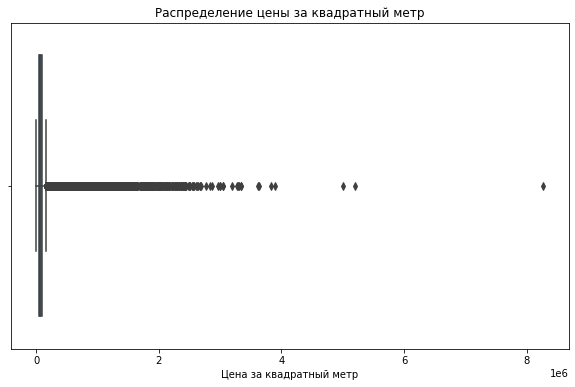

In [62]:
plt.figure(figsize = (10, 6))
# строим boxplot:
sns.boxplot(data=df, x='price_m')
# настраиваем надписи:
plt.title('Распределение цены за квадратный метр')
plt.xlabel('Цена за квадратный метр')
plt.show()

Наблюдаем очень много выбросов

In [68]:
# вычисляем межквартильный размах:
iqr = 1.5 * (np.percentile(df['price_m'], 75) - np.percentile(df['price_m'], 25))
# вычисляем значения усов:
left = np.percentile(df['price_m'], 25) - iqr # левый ус
right = np.percentile(df['price_m'], 75) + iqr # правый ус
# создаем срез данных, удовлетворяющих условию и считаем его объем:
new = df.query('@left <= price_m <= @right')['price_m'].count()
# вычисляем долю от общего объема:
fraction = 1 - new / df.shape[0]
# вычисляем результаты:
print(f'Усы: {left, right}')
print(f'Объем данных без выбросов: {new}')
print(f'Доля выбросов: {fraction:.2%}')

Усы: (-29415.204678362563, 167543.8596491228)
Объем данных без выбросов: 4837840
Доля выбросов: 7.58%


In [73]:
# вычисляем значения усов:
left = np.percentile(df['price_m'], 0.01)
right = np.percentile(df['price_m'], 99.95)
# создаем срез данных, удовлетворяющих условию и считаем его объем:
new = df.query('@left <= price_m <= @right')['price_m'].count()
# вычисляем долю от общего объема:
fraction = 1 - new / df.shape[0]
# вычисляем результаты:
print(f'Усы: {left, right}')
print(f'Объем данных без выбросов: {new}')
print(f'Доля выбросов: {fraction:.2%}')

Усы: (45.15611241446725, 750000.0)
Объем данных без выбросов: 5231597
Доля выбросов: 0.06%


Удалим наши представленные выбросы

In [74]:
df = df.query('@left <= price_m <= @right').reset_index(drop=True)
df

,price,date,region,building_type,level,levels,rooms,area,kitchen_area,object_type,reg_name,price_m
0,6050000,2018-02-19,2661,1,8,10,3,82.6,10.8,1,Санкт-Петербург,73780.487805
1,8650000,2018-02-27,81,3,5,24,2,69.1,12.0,1,Московская область,125362.318841
2,4000000,2018-02-28,2871,1,5,9,3,66.0,10.0,1,Нижегородская область,60606.060606
3,1850000,2018-03-01,2843,4,12,16,2,38.0,5.0,2,Краснодарский край,48684.210526
4,5450000,2018-03-01,81,3,13,14,2,60.0,10.0,1,Московская область,90833.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
5231592,19739760,2021-05-01,3,1,8,17,4,93.2,13.8,2,Москва,212255.483871
5231593,12503160,2021-05-01,3,2,17,32,2,45.9,6.6,2,Москва,277848.000000
5231594,8800000,2021-05-01,2871,2,4,17,3,86.5,11.8,1,Нижегородская область,102325.581395
5231595,11831910,2021-05-01,3,1,8,33,2,52.1,18.9,2,Москва,227536.730769


Теперь попробуем построить графики, чтобы отразить нашу динамику

In [77]:
pivot_building_type= df.pivot_table(index=df['date'].dt.to_period('M'), 
                      columns='building_type',
                      aggfunc=lambda x: round(x.mean()), 
                      values='price_m').reset_index()
# переименовываем столбцы:
pivot_building_type.columns = ['Дата', 'Другое', 'Панельный тип', 'Кирпично-монолитный тип', 'Кирпичный тип', 'Блочный тип', 'Деревянный тип']
pivot_building_type

,Дата,Другое,Панельный тип,Кирпично-монолитный тип,Кирпичный тип,Блочный тип,Деревянный тип
0,2018-02,NaN,67193.0,NaN,125362.0,NaN,NaN
1,2018-03,NaN,89046.0,81958.0,61560.0,48684.0,NaN
2,2018-04,NaN,96897.0,140159.0,64605.0,47844.0,NaN
3,2018-05,NaN,64951.0,53409.0,82794.0,NaN,NaN
4,2018-06,NaN,86954.0,82458.0,60374.0,70103.0,21698.0
5,2018-07,NaN,61926.0,96932.0,55858.0,63301.0,NaN
6,2018-08,NaN,84103.0,85962.0,63431.0,56647.0,NaN
7,2018-09,97976.0,55738.0,93918.0,62543.0,60963.0,67630.0
8,2018-10,63401.0,56534.0,95014.0,63712.0,60447.0,80115.0
9,2018-11,63570.0,56248.0,95136.0,62486.0,59511.0,28799.0


In [90]:
# создаем сводную таблицу:
pivot_levels = df.pivot_table(index='levels', 
                     aggfunc=lambda x: round(x.mean()), 
                     values='price_m').reset_index()
# переименовываем столбцы:
pivot_levels.columns = ['Количество этажей', 'Цена за метр в квадрате']
# выводим первые 5 строк:
pivot_levels

,Количество этажей,Цена за метр в квадрате
0,1,35733
1,2,37973
2,3,54702
3,4,68603
4,5,61173
5,6,82660
6,7,106001
7,8,120454
8,9,75387
9,10,53052


In [83]:
# создаем сводную таблицу:
pivot_level = df.pivot_table(index='level', 
                     aggfunc=lambda x: round(x.mean()), 
                     values='price_m').reset_index()
# переименовываем столбцы:
pivot_level.columns = ['Этаж', 'Цена за метр в квадрате']
# выводим первые 5 строк:
pivot_level.head()

,Этаж,Цена за метр в квадрате
0,1,62314
1,2,72658
2,3,74444
3,4,74650
4,5,72877


In [89]:
# создаем сводную таблицу:
pivot_rooms = df.pivot_table(index='rooms', 
                     aggfunc=lambda x: round(x.mean()), 
                     values='price_m').reset_index()
# переименовываем столбцы:
pivot_rooms.columns = ['Количество комнат', 'Цена за метр в квадрате']
# выводим первые 5 строк:
pivot_rooms

,Количество комнат,Цена за метр в квадрате
0,-1,87934
1,1,79405
2,2,78758
3,3,77439
4,4,87617
5,5,110946
6,6,143872
7,7,127292
8,8,124876
9,9,101322


In [88]:
# создаем сводную таблицу:
pivot_object_type = df.pivot_table(index=df['date'].dt.to_period('M'), 
                     columns='object_type',
                     aggfunc=lambda x: round(x.mean()), 
                     values='price_m').reset_index()
# переименовываем столбцы:
pivot_object_type.columns = ['Дата', 'Новостройка', 'Вторичка']
# выводим первые 5 строк:
pivot_object_type

,Дата,Новостройка,Вторичка
0,2018-02,86583.0,NaN
1,2018-03,74570.0,84915.0
2,2018-04,86333.0,55558.0
3,2018-05,76029.0,54236.0
4,2018-06,70957.0,64090.0
5,2018-07,61620.0,67265.0
6,2018-08,69852.0,86002.0
7,2018-09,71190.0,63867.0
8,2018-10,67052.0,66234.0
9,2018-11,66459.0,65413.0


In [87]:
# создаем сводную таблицу:
pivot_reg_name = df.pivot_table(index='reg_name', 
                     aggfunc=lambda x: round(x.mean(),2), 
                     values='price_m').reset_index()
# переименовываем столбцы:
pivot_reg_name.columns = ['Регион', 'Цена за метр в квадрате']
# выводим первые 5 строк:
pivot_reg_name

,Регион,Цена за метр в квадрате
0,Алтайский край,44752.62
1,Амурская область,85517.58
2,Архангельская область,72775.63
3,Астраханская область,46899.31
4,Белгородская область,55776.17
...,...,...
78,Челябинская область,38746.07
79,Чеченская Республика,42822.64
80,Чувашская Республика,45188.31
81,Ямало-Ненецкий автономный округ,75363.32


<Figure size 720x432 with 0 Axes>

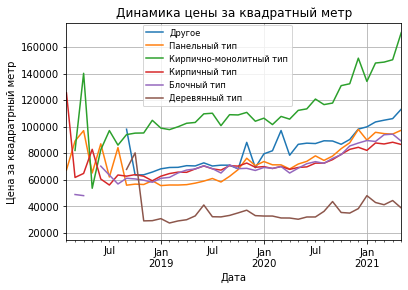

In [81]:
plt.figure(figsize = (10, 6))
# строим график:
pivot_building_type.plot(x='Дата', y=[ 'Другое', 'Панельный тип', 'Кирпично-монолитный тип', 'Кирпичный тип', 'Блочный тип', 'Деревянный тип'])
# настраиваем график:
plt.title('Динамика цены за квадратный метр')
plt.xlabel('Дата')
plt.ylabel('Цена за квадратрный метр')
plt.grid(True)
plt.legend(['Другое', 'Панельный тип', 'Кирпично-монолитный тип', 'Кирпичный тип', 'Блочный тип', 'Деревянный тип'], 
           loc='upper center', bbox_to_anchor=(0.45, 1.01), fontsize='small')
plt.show()

1. Присутствует заметный тренд на последующее увеличение цен на все типы домов, за исключением деревянных, для которых цены остаются стабильными.

2. С начала рассматриваемого периода, от мая 2018 года до осени 2018 года, наблюдались значительные колебания цен на все типы домов, при этом различия между типами были незначительными.

3. С октября 2018 года, когда произошел резкий спад цен на деревянные дома, колебания цен на все остальные типы домов стали менее значительными.

4. Можем сказать, что самым дорогим типом дома оказался кирпично-монолитный, в то время как самым доступным стал деревянный. Цены на другие типы домов практически одинаковы между собой.

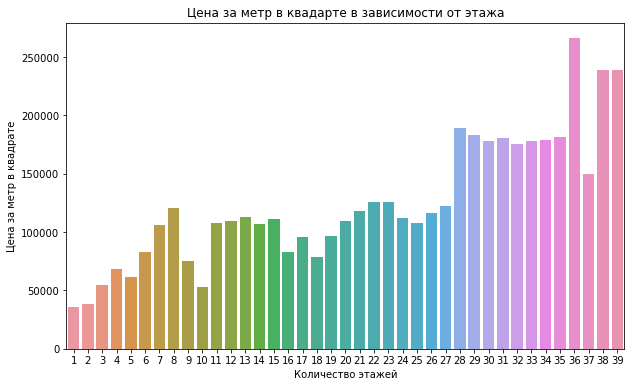

In [95]:
# устанавливаем размер рисунка:
plt.figure(figsize = (10, 6))
# строим столбчатую диаграмму:
sns.barplot(data=pivot_levels, x='Количество этажей', y='Цена за метр в квадрате')
# настраиваем рисунок:
plt.title('Цена за метр в квадарте в зависимости от этажа')
plt.xlabel('Количество этажей')
plt.ylabel('Цена за метр в квадрате')
plt.show()

Наблюдаем некую зависимость между количеством этажей в доме и ценой. Однако, иногда цены с ростом этажей падают.

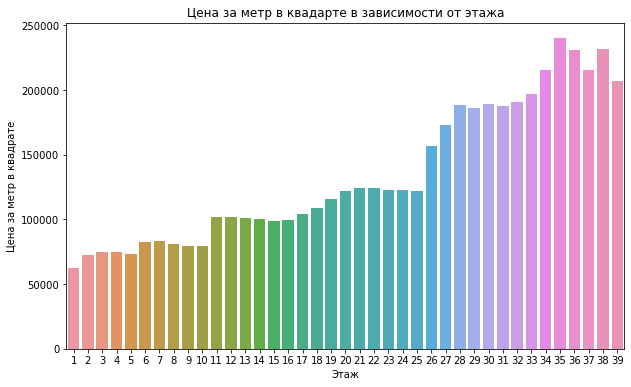

In [94]:
# устанавливаем размер рисунка:
plt.figure(figsize = (10, 6))
# строим столбчатую диаграмму:
sns.barplot(data=pivot_level, x='Этаж', y='Цена за метр в квадрате')
# настраиваем рисунок:
plt.title('Цена за метр в квадарте в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена за метр в квадрате')
plt.show()

А вот здесь мы уже наблюдаем сильную зависмость между ценой  и этажом. Явно видно, что, чем больше этаж, тем выше цена. Но присутсвуют и ситуации, где этажи меняются, а цена примерно остаётся на одном уровне.

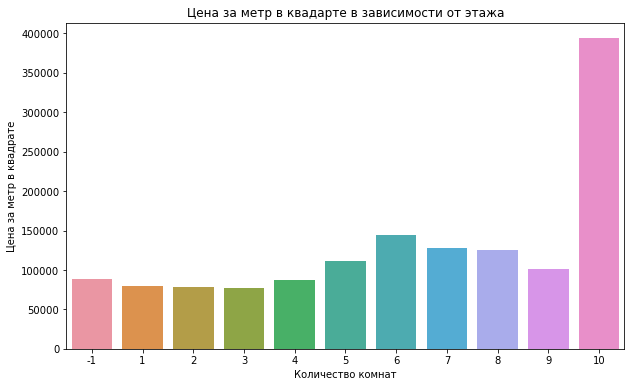

In [96]:
# устанавливаем размер рисунка:
plt.figure(figsize = (10, 6))
# строим столбчатую диаграмму:
sns.barplot(data=pivot_rooms, x='Количество комнат', y='Цена за метр в квадрате')
# настраиваем рисунок:
plt.title('Цена за метр в квадарте в зависимости от этажа')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за метр в квадрате')
plt.show()

Здесь сразу бросается в глаза странная ситуация. Почему-то метр в квадрате квартира с 10 комнатами стоит намного выше, чем все остальные квартиры. При этом метр в квадрате стоит дешевле, например, у 7, 8, 9 комнатных квартир, по сравнению с 6 комнатными. Такая же ситуация с 2, 3, 4 комнатными. Помимо 10 комнатных квартир, всплеск роста цены за метр в квадрате наблюдаем у 6 комнатных квартир. 

<Figure size 1080x720 with 0 Axes>

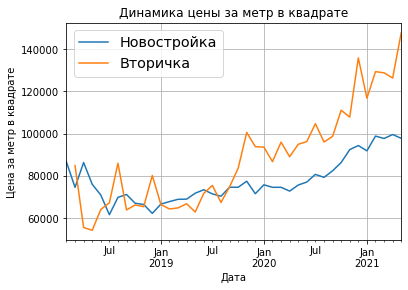

In [101]:
# устанавливаем размер рисунка:
plt.figure(figsize = (15, 10))
# строим линейный график:
pivot_object_type.plot(x='Дата', y=['Новостройка', 'Вторичка'])
# настраиваем график:
plt.title('Динамика цены за метр в квадрате')
plt.xlabel('Дата')
plt.ylabel('Цена за метр в квадрате')
plt.grid(True)
plt.legend(['Новостройка', 'Вторичка'], loc='upper left', fontsize='x-large')
plt.show()

Видим, что, конечно, же в общей картине вторичка стоит дороже, однако, есть временные промежутке, где наблюдалась обратная ситуация. Связать это можно с различными ситуациями.

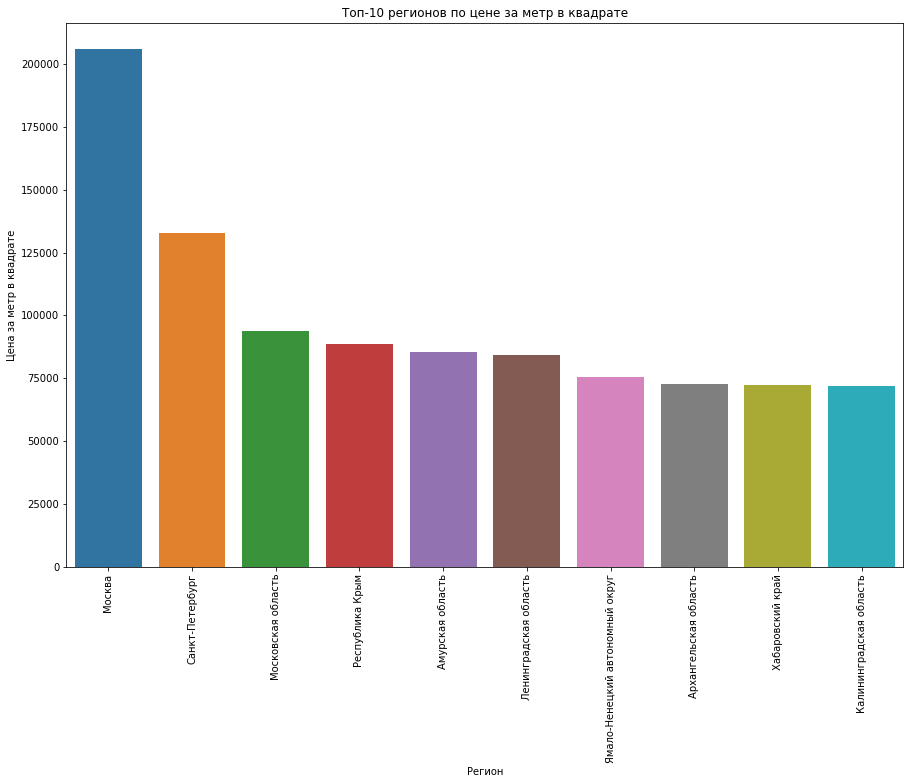

In [107]:
# устанавливаем размер рисунка:
plt.figure(figsize = (15, 10))
# строим столбчатую диаграмму:
sns.barplot(data=pivot_reg_name.sort_values(by='Цена за метр в квадрате', ascending=False).head(10), x='Регион', y='Цена за метр в квадрате')
# настраиваем рисунок:
plt.title('Топ-10 регионов по цене за метр в квадрате')
plt.xlabel('Регион')
plt.ylabel('Цена за метр в квадрате')
plt.xticks(rotation=90)
plt.show()

Естественно, по данной гистограмме видно, что самым дорогим регионом для покупки недвижимости является мрсква, а за ней Санкт-Петербург. Неожиданным для меня было 4 и 5 место в данном топе. Их заняли Республика Коми и Амурская область. Закрывает же этот топКалининградская область

### 4. Определите от каких признаков зависит стоимость объекта недвижимости. Найдите скрытые закономерности.

In [108]:
# выводим коэффициенты корреляции столбца 'price' и остальных столбцов:
df.corr(method='kendall')['price']

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4812: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


price            1.000000
region          -0.316520
building_type    0.000806
level            0.188182
levels           0.276133
rooms            0.303248
area             0.367353
kitchen_area     0.315645
object_type      0.054167
price_m          0.631426
Name: price, dtype: float64

In [109]:
# выводим коэффициенты корреляции столбца 'price' и остальных столбцов:
df.corr(method='spearman')['price']

price            1.000000
region          -0.442735
building_type    0.001924
level            0.268962
levels           0.390668
rooms            0.393693
area             0.520578
kitchen_area     0.446163
object_type      0.066216
price_m          0.821580
Name: price, dtype: float64

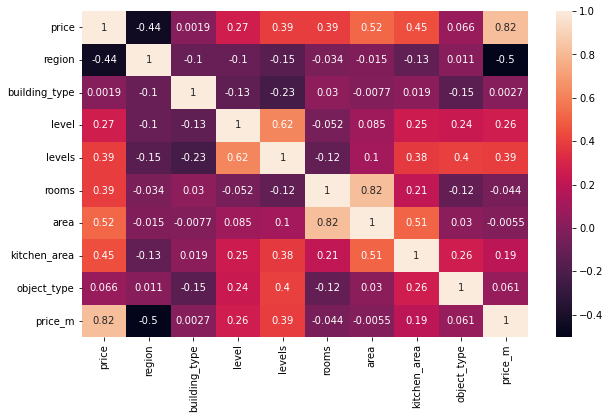

In [112]:
plt.figure(figsize=(10, 6))
# строим тепловую карту:
sns.heatmap(df.corr(method='spearman'), annot=True)
plt.show()

Посмотрев на матрицу корреляций, можно сделать вывод, что наибольшая линейная зависимость находится у level и levels, а также у rooms и area. Как мы видим, цена по большей степени будет зависеть от общей площади,затем от количества комнат, от площади кухни, от клоличества этажей в доме и далее от этажа, а также от типа дома. В остальных признаках наблюдается 0 зависимость или отрицательная.

In [115]:
# создаем сводную таблицу:
region_akp = df.pivot_table(index='region', values=['area', 'kitchen_area', 'price']).reset_index()
# выводим первые 5 строк:
region_akp

,region,area,kitchen_area,price
0,3,57.311214,11.828286,1.214334e+07
1,69,49.567532,8.761688,2.088702e+06
2,81,51.788066,10.319016,4.760100e+06
3,821,59.434642,12.423087,2.514738e+06
4,1010,49.183857,8.969691,2.338040e+06
...,...,...,...,...
79,13919,66.482064,11.663903,2.572218e+06
80,14368,51.823103,7.976560,2.283814e+06
81,14880,56.171461,9.529073,3.939458e+06
82,16705,50.328777,8.415108,2.939970e+06


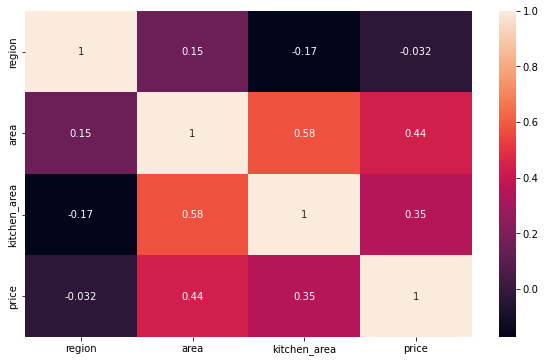

In [116]:
plt.figure(figsize=(10, 6))
# строим тепловую карту:
sns.heatmap(region_akp.corr(method='spearman'), annot=True)
plt.show()

Как видим, среди этих данных связь не очень большая. Самая большая зависимость наблюдается у общей площади и площади кухни, что собственно очевидно.

In [117]:
# создаем сводную таблицу:
level_akp = df.pivot_table(index='level', values=['area', 'kitchen_area', 'price']).reset_index()
# выводим первые 5 строк:
level_akp.head()

,level,area,kitchen_area,price
0,1,49.987484,9.051768,2.932278e+06
1,2,52.894698,9.898828,3.896760e+06
2,3,53.059323,10.028705,4.088400e+06
3,4,53.270382,9.965489,4.101146e+06
4,5,53.121125,9.878156,3.987211e+06


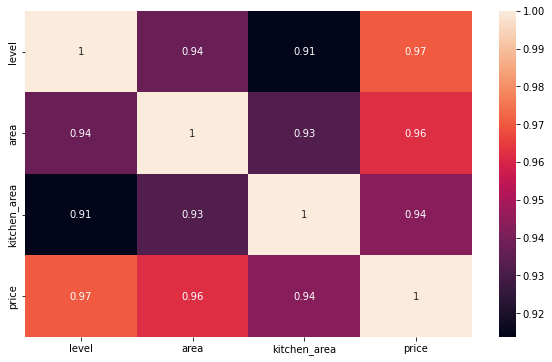

In [121]:
# устанавливаем размер рисунка:
plt.figure(figsize=(10, 6))
# строим тепловую карту:
sns.heatmap(level_akp.corr(method='spearman'), annot=True)
plt.show()

Здесь уже связь очень тесная. Мы наблюдаем сильную зависимость цены от этажа, общей площади и площади кухни

In [119]:
# создаем сводную таблицу:
levels_akp = df.pivot_table(index='levels', values=['area', 'kitchen_area', 'price']).reset_index()
# выводим первые 5 строк:
levels_akp.head()

,levels,area,kitchen_area,price
0,1,52.697063,9.778729,1.628589e+06
1,2,50.339849,8.345467,1.840805e+06
2,3,50.632180,9.810538,2.751724e+06
3,4,54.323223,9.905186,3.835019e+06
4,5,48.309566,7.928796,2.927853e+06


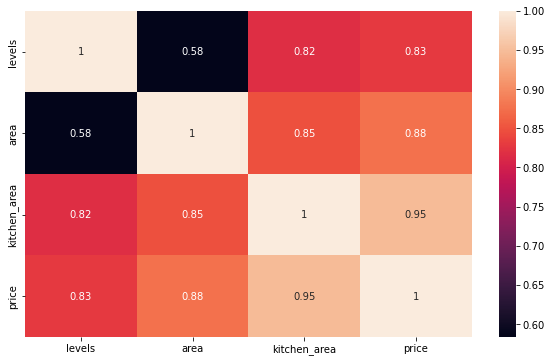

In [122]:
# устанавливаем размер рисунка:
plt.figure(figsize=(10, 6))
# строим тепловую карту:
sns.heatmap(levels_akp.corr(method='spearman'), annot=True)
plt.show()

Здесь тоже можно скзаать, что некоторые признаки представлены в довольно сильной зависимости. Наблюдаем тесную связь между площадью кухни и количеством этажей, ценой и количеством этажей. А вот общая площадь и количество этажей находятся в средней зависимости.

In [123]:
# создаем сводную таблицу:
rooms_akp = df.pivot_table(index='rooms', values=['area', 'kitchen_area', 'price']).reset_index()
# выводим первые 5 строк:
rooms_akp

,rooms,area,kitchen_area,price
0,-1,34.152563,5.891468,2.592878e+06
1,1,38.150312,10.000894,2.997268e+06
2,2,55.417759,10.693728,4.426057e+06
3,3,76.419626,12.013903,6.188476e+06
4,4,100.613094,13.685378,9.845922e+06
5,5,161.179704,19.534238,1.898737e+07
6,6,189.745726,20.589063,2.823059e+07
7,7,212.186676,22.602244,2.784530e+07
8,8,228.319255,21.236646,2.874129e+07
9,9,198.070833,19.985256,2.157964e+07


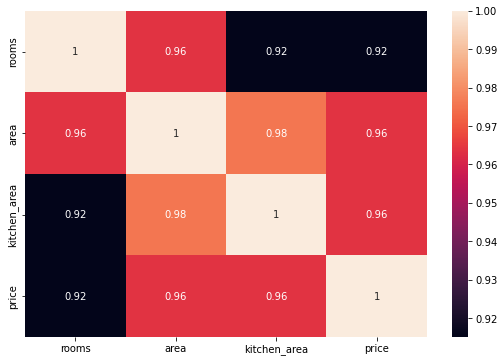

In [124]:
# устанавливаем размер рисунка:
plt.figure(figsize=(9, 6))
# строим тепловую карту:
sns.heatmap(rooms_akp.query('rooms != 10').corr(method='spearman'), annot=True)
plt.show()

А здесь мы видим сильную связь между количеством комнатами и ценой, количеством комнат и общей площадью и между количеством комнат и площадью кухни.

### Вывод:
Цена недвижимости имеет взаимосвязь с такими факторами, как общая площадь объекта, площадь кухни, этаж, количество этажей и количество комнат.

По данному графику мы наблюдаем, что наиболее важность представляет площадь и этаж.

### 5. Когда выгодно покупать/продавать объект недвижимости?

Давайте проанализируем изменение средней стоимости недвижимости в зависимости от типа строения.

In [132]:
#cоздаем таблицу-сводку:
pivot_building_type = df.pivot_table(index=df['date'].dt.to_period('M'),
                                     columns='building_type',
                                     aggfunc=lambda x: round(x.mean()),
                                     values='price').reset_index()

#переименовываем столбцы:
pivot_building_type.columns = ['Дата', 'Другое', 'Панельный тип', 'Кирпично-монолитный тип', 'Кирпичный тип', 'Блочный тип', 'Деревянный тип']

#выводим первые 5 строк:
pivot_building_type.head()

,Дата,Другое,Панельный тип,Кирпично-монолитный тип,Кирпичный тип,Блочный тип,Деревянный тип
0,2018-02,NaN,5025000.0,NaN,8650000.0,NaN,NaN
1,2018-03,NaN,4600248.0,3843236.0,3580000.0,1850000.0,NaN
2,2018-04,NaN,4967000.0,5766667.0,4031538.0,2475000.0,NaN
3,2018-05,NaN,3625000.0,2350000.0,5379891.0,NaN,NaN
4,2018-06,NaN,4816429.0,3806667.0,4295000.0,6800000.0,1150000.0


<Figure size 720x432 with 0 Axes>

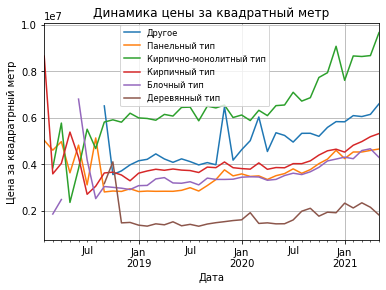

In [133]:
plt.figure(figsize = (10, 6))
# строим график:
pivot_building_type.plot(x='Дата', y=[ 'Другое', 'Панельный тип', 'Кирпично-монолитный тип', 'Кирпичный тип', 'Блочный тип', 'Деревянный тип'])
# настраиваем график:
plt.title('Динамика цены за квадратный метр')
plt.xlabel('Дата')
plt.ylabel('Цена за квадратрный метр')
plt.grid(True)
plt.legend(['Другое', 'Панельный тип', 'Кирпично-монолитный тип', 'Кирпичный тип', 'Блочный тип', 'Деревянный тип'], 
           loc='upper center', bbox_to_anchor=(0.45, 1.01), fontsize='small')
plt.show()

#### Вывод:
- Панельные дома: наиболее выгодно продавать в ноябре-декабре, а приобретать - в январе-апреле.
- Кирпично-монолитные дома: предпочтительнее продавать в мае-июне, а покупать - в январе-феврале.
- Кирпичные дома: наиболее выгодное время для продажи - сентябрь-ноябрь, для покупки - декабрь-январь.
- Блочные дома: оптимально продавать в марте-апреле, а приобретать - в декабре и май-августе.
- Деревянные дома: временные предпочтения могут быть различны в зависимости от обстоятельств.

In [134]:
# создаем сводную таблицу:
pivot_object_type = df.pivot_table(index=df['date'].dt.to_period('M'), 
                     columns='object_type',
                     aggfunc=lambda x: round(x.mean()), 
                     values='price_m').reset_index()
# переименовываем столбцы:
pivot_object_type.columns = ['Дата', 'Новостройка', 'Вторичка']
# выводим первые 5 строк:
pivot_object_type

,Дата,Новостройка,Вторичка
0,2018-02,86583.0,NaN
1,2018-03,74570.0,84915.0
2,2018-04,86333.0,55558.0
3,2018-05,76029.0,54236.0
4,2018-06,70957.0,64090.0
5,2018-07,61620.0,67265.0
6,2018-08,69852.0,86002.0
7,2018-09,71190.0,63867.0
8,2018-10,67052.0,66234.0
9,2018-11,66459.0,65413.0


<Figure size 1080x720 with 0 Axes>

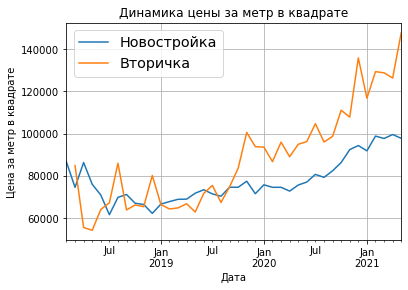

In [135]:
# устанавливаем размер рисунка:
plt.figure(figsize = (15, 10))
# строим линейный график:
pivot_object_type.plot(x='Дата', y=['Новостройка', 'Вторичка'])
# настраиваем график:
plt.title('Динамика цены за метр в квадрате')
plt.xlabel('Дата')
plt.ylabel('Цена за метр в квадрате')
plt.grid(True)
plt.legend(['Новостройка', 'Вторичка'], loc='upper left', fontsize='x-large')
plt.show()

 #### Вывод: 
 - Вторичное жилье показывает более высокий потенциал для продажи в сентябре-ноябре, а для приобретения - в декабре-январе и августе.
 - Новостройки лучше всего реализовывать в июле и ноябре-декабре, а приобретать - в январе-феврале и августе.

In [136]:
# Установка столбца с датой в качестве индекса
df.set_index('date', inplace=True)


In [137]:
# Вычисление средней цены за vtczw
period = 'M'  # Период: 'M' - месяц
mean_prices = df['price'].resample(period).mean()

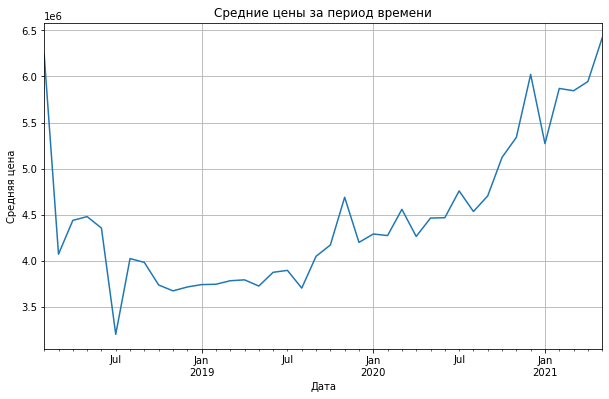

In [138]:
# Визуализация средних цен за периоды времени
plt.figure(figsize=(10, 6))
mean_prices.plot()
plt.title('Средние цены за период времени')
plt.xlabel('Дата')
plt.ylabel('Средняя цена')
plt.grid(True)
plt.show()

#### Вывод:
По данному графику видно, что недвижимость выгодно было покупать в июле 2018 г, июне 2019, феврале и апреле 2020 г, а также в январе 2021г. При этом мы всё же наблюдаем рост цен на недвижимость за расмматриваемый период. Также хочется отметить, что в рассматриваемых период преимущсетвенным сезоном для дешевой покупки стал летний период.

### 6. Создайте модель прогноза цены объекта недвижимости.

In [140]:
# раздяем данные на признаки
y = df['price']
x = df[['area', 'kitchen_area', 'level', 'levels', 'rooms']]

In [141]:
# разделение данных на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [142]:
# меняем размерность:
x_train = np.array(x_train).reshape(-1, 5)
# создаем объект класса StandardScaler:
scaler = StandardScaler()
# обучаем стандартизатор и преобразуем данные:
x_train_standart_scaler = scaler.fit_transform(x_train)

In [145]:
# создаем датафрейм из столбцов-признаков-факторов:
x_standart_scaler = pd.DataFrame(x_train_st, columns=['area', 'kitchen_area', 'level', 'levels', 'rooms']) 
x_standart_scaler

,area,kitchen_area,level,levels,rooms
0,-0.207692,-0.921296,-0.449350,-0.970815,0.239163
1,0.153714,-0.096106,-0.449350,0.388425,0.239163
2,0.665706,0.564047,-0.248833,-0.366708,2.115259
3,2.111330,-0.261144,-0.850384,0.237398,1.177211
4,1.051205,0.481528,1.355302,2.049717,1.177211
...,...,...,...,...,...
4185272,-0.388395,1.719314,-0.649867,-0.970815,-0.698884
4185273,-0.149265,0.068932,-1.050901,-0.215682,-0.698884
4185274,-0.328161,1.554276,1.756336,2.049717,-0.698884
4185275,-0.237809,-0.426182,-0.649867,-0.366708,0.239163


In [147]:
# создаем модель линейной регрессии:
model = LinearRegression()
# обучаем нашу модель:
model.fit(x_standart_scaler, y_train)
# выводим коэффициенты регрессии:
print(model.coef_, model.intercept_)

[1192939.55324185  860920.97572256   87196.26685961  962352.93632316
  913203.42817109] 4380196.817279717


In [148]:
# используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(x_test)
# делаем прогнозы
predictions = model.predict(x_test_st)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [149]:
# считаем r^2:
r2_score(y_test, predictions)

0.2705576076172028

In [151]:
# Получение остатков модели
residuals = y_test - predictions

# Расчет стандартизированных остатков
standart_residuals = (residuals - np.mean(residuals)) / np.std(residuals)

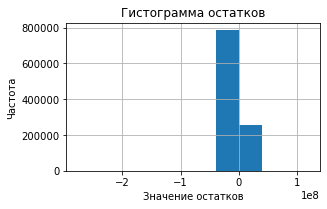

In [152]:
plt.subplots(figsize=(10, 6))
# остатки
plt.subplot(2, 2, 1)
plt.hist(residuals)
plt.xlabel('Значение остатков')
plt.ylabel('Частота')
plt.title('Гистограмма остатков')
plt.grid(True)

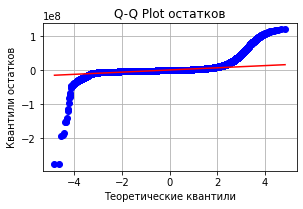

In [153]:
plt.subplots(figsize=(10, 6))
# остатки и  предсказанные значения
plt.subplot(2, 2, 2)
st.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Теоретические квантили')
plt.ylabel('Квантили остатков')
plt.title('Q-Q Plot остатков')
plt.grid(True)

Text(0.5, 1.0, 'Остатки и предсказанные значения')

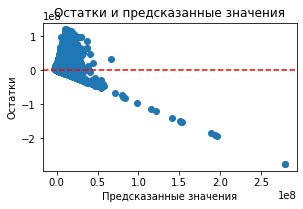

In [155]:
plt.subplots(figsize=(10, 6))
# остатки касаемо прогноза
plt.subplot(2, 2, 3)
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки и предсказанные значения')

C:\Users\София\AppData\Local\Temp\ipykernel_19252\3370630043.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')


Text(0.5, 1.0, 'Предсказанные и фактические значения')

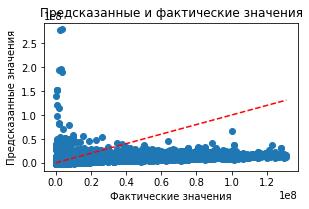

In [156]:
plt.subplots(figsize=(10, 6))
# Предсказанные и фактические значения
plt.subplot(2, 2, 4)
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],  "k--", color='r')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные и фактические значения')

#### Вывод:
При увеличении площади на 1 м² средняя цена возрастает примерно на 2 920 273 рубля. При увеличении площади кухни на 1 м² цена в среднем увеличивается на 362 481 рубль. Увеличение номера этажа на 1 прибавляет в среднем 62 735 рублей к цене. По мере роста числа этажей на 1 средняя цена возрастает на 762 799 рублей, в то время как увеличение числа комнат на 1 приводит к снижению средней цены на 446 504 рубля.

In [165]:
# есть столбцы с признаками 'площадь', 'количество комнат', 'этаж', 'тип дома', 'тип объекта',' регион' и 'стоимость'
# выбор признаков для обучения модели
features = ['area', 'rooms', 'level', 'object_type', 'building_type', "region"]
х = df[features]
y = df['price']

In [166]:
# разделение данных на обучающую и тестовую выборки
х_train, х_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
# создание модели линейной регрессии
model = LinearRegression()


In [168]:
# обучение модели на обучающих данных
model.fit(X_train, y_train)

LinearRegression()

In [169]:
# прогнозирование цен на тестовых данных
y_pred = model.predict(X_test)

In [173]:
# оценка точности модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Среднеквадратичная ошибка (MSE): {mse}')
print(f'Коэффициент детерминации (R^2): {r2}')


Среднеквадратичная ошибка (MSE): 19337560509493.793
Коэффициент детерминации (R^2): 0.2738376303488389


In [172]:
#Модель для прогнозирования цены для новых данных
new_data = [[120, 3, 4, 4, 1, 2661]]  # Пример новых данных: 'площадь', 'количество комнат', 'этаж', 'тип дома', 'тип объекта',' регион'.
predicted_price = model.predict(new_data)
print(f'Прогнозируемая цена для новых данных: {predicted_price}')

Прогнозируемая цена для новых данных: [10860080.04818972]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Таким образом, создав модель для прогноза, мы узнали, что 3-х комнатная квартира площадью 120 кв м, на 4 этажа, панельного дома, в новостройке в Санкт-Петербурге обойдется порядка 11262844р. 